# Aula 7, 6/outubro/2016

## Será que conseguiriamos prever 'atividade por semana'?

a partir de altura, peso, time e IMC??

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('alunos.csv')

df['IMC'] = df.Peso/((df.Altura/100) ** 2)

In [2]:
df.head()

,Atividade_por_semana,Altura,Peso,Time,IMC
0,4,173,85,Fluminense,28.400548
1,0,170,70,Flamengo,24.221453
2,2,183,85,NaN,25.381469
3,4,176,70,Sao Paulo,22.598140
4,9,178,73,Palmeiras,23.040020


In [3]:
del df['Time']

In [4]:
# df['Time'].fillna('ND', inplace=True)

In [5]:
df.columns

Index([u'Atividade_por_semana', u'Altura', u'Peso', u'IMC'], dtype='object')

In [ ]:
# X, y = df[[u'Altura', u'Peso', u'IMC', u'Time']], df[u'Atividade_por_semana']
# X, y = df[[u'Altura', u'Peso', u'IMC']], df[u'Atividade_por_semana']
X, y = df[[u'Altura', u'Peso']], df[u'Atividade_por_semana']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# X.Time.unique()

In [ ]:
# X = pd.get_dummies(X, columns = ['Time'], drop_first=True)

In [ ]:
X.head()

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [ ]:
lreg = LinearRegression()

In [ ]:
lreg.fit(X_train, y_train)

In [ ]:
pred = pd.Series(lreg.predict(X_valid), index = y_valid.index)
pred

In [ ]:
res_valid = pd.concat([pred, y_valid], axis = 1)

In [ ]:
res_valid.columns = ['pred', 'gold']

In [ ]:
res_valid

In [ ]:
res_valid['erro'] = (res_valid.pred - res_valid.gold) ** 2

In [ ]:
res_valid

In [ ]:
mse = np.mean(res_valid.erro)
print 'MSE =', mse
print 'RMSE =', np.sqrt(mse)

In [ ]:
X.head()

In [ ]:
X.head()

In [ ]:
lreg

In [ ]:
df_teste = pd.DataFrame([[193, 93, 93.0/(1.93 ** 2)], [175, 114, 114.0/(1.75 ** 2)], 
                         [184, 100, 100.0/(1.84 ** 2)]])

In [ ]:
df_teste

In [ ]:
lreg.predict(df_teste)

In [ ]:
lreg.predict([[176, 80, 80.0/(1.76*1.76)]])

## Regressão Logistica

In [1]:
# import de modulos pandas e numpy
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# import de modulos para graficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# imports para Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# para avaliacao
from sklearn import metrics

# dataset
import statsmodels.api as sm

### Função logística

A função logistica [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function) recebe como argumento uma valor de $-\infty$ a $+\infty$, e retorna um valor no intervalo $(0,1)$

$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

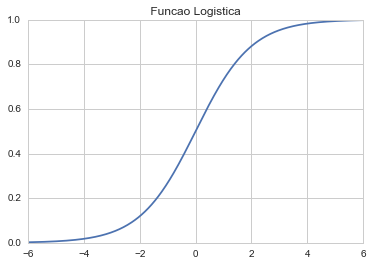

In [2]:
# Função Logistica
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# cria um grade de -6 a 6 ( 500 elementos, igualmente espaçados)
x_grade = np.linspace(-6,6,500)

# calcula os valores de y
y = np.array([logistic(x) for x in x_grade])

# melhor usar exp do numpy que aceita um vetor como argumento
y = 1/(1 + np.exp(-1.0 * x_grade))

# plot
plt.plot(x_grade,y)
plt.title(' Funcao Logistica ')

A ideia é considerar a função logistica gerando uma probabilidade, a partir de um polinomio:


$$ y = a_0 + a_1.x_{1} + a_2.x_{2} ... + a_m.x_{m}$$

onde $a_0, a_1, ..., a_m$ são coeficientes a serem aprendidos, de forma que a equação abaixo:<br>


$$ F(x)= \frac{1}{1+e^{-(a_0 + a_1.x_{1} + a_2.x_{2} ... + a_m.x_{m})}}$$

forneça a 'melhor' probabilidade de sucesso. 

Para tanto o algoritmo procura encontrar os melhores $a_0, a_1, ..., a_m$ que minimizam o erro. 

Na predição, o $x^{(i)}$ fornece um $F(x^{(i)})$. 
* Se $F(x^{(i)}) \leq 0.5$, predição será a classe 0
* Se $F(x^{(i)}) > 0.5$, predição será a classe 1

#### Exemplo prático

In [3]:
import webbrowser

url = 'http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html'

webbrowser.open_new(url)

True

Quantidade de observações: 6366
Quantidade de features: 9
Definições:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


In [4]:
# Carrega dataframe 

df = sm.datasets.fair.load_pandas().data

In [5]:
df.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
1054,4.0,42.0,23.0,2.0,2.0,12.0,3.0,4.0,0.152174
6046,4.0,42.0,23.0,4.0,1.0,17.0,4.0,4.0,0.000000
1768,5.0,37.0,13.0,2.0,3.0,14.0,5.0,5.0,0.615385
4260,2.0,32.0,6.0,2.0,2.0,16.0,4.0,2.0,0.000000
3092,5.0,22.0,0.5,0.0,3.0,14.0,3.0,4.0,0.000000


In [6]:
# Define uma coluna, indicador binário que indica se a pessoa teve um caso extra-conjugal
df['pulou_a_cerca'] = [ 1 if a else 0 for a in df.affairs]

In [7]:
df.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,pulou_a_cerca
5762,3.0,17.5,2.5,0.0,2.0,12.0,2.0,2.0,0.000000,0
1690,5.0,32.0,9.0,2.0,2.0,14.0,4.0,4.0,0.111111,1
4538,5.0,27.0,6.0,0.0,2.0,16.0,4.0,3.0,0.000000,0
2589,5.0,22.0,2.5,0.0,2.0,12.0,3.0,4.0,0.000000,0
6179,5.0,22.0,0.5,0.0,4.0,14.0,3.0,5.0,0.000000,0


In [8]:
# Media por cada label
df.groupby('pulou_a_cerca').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
pulou_a_cerca,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


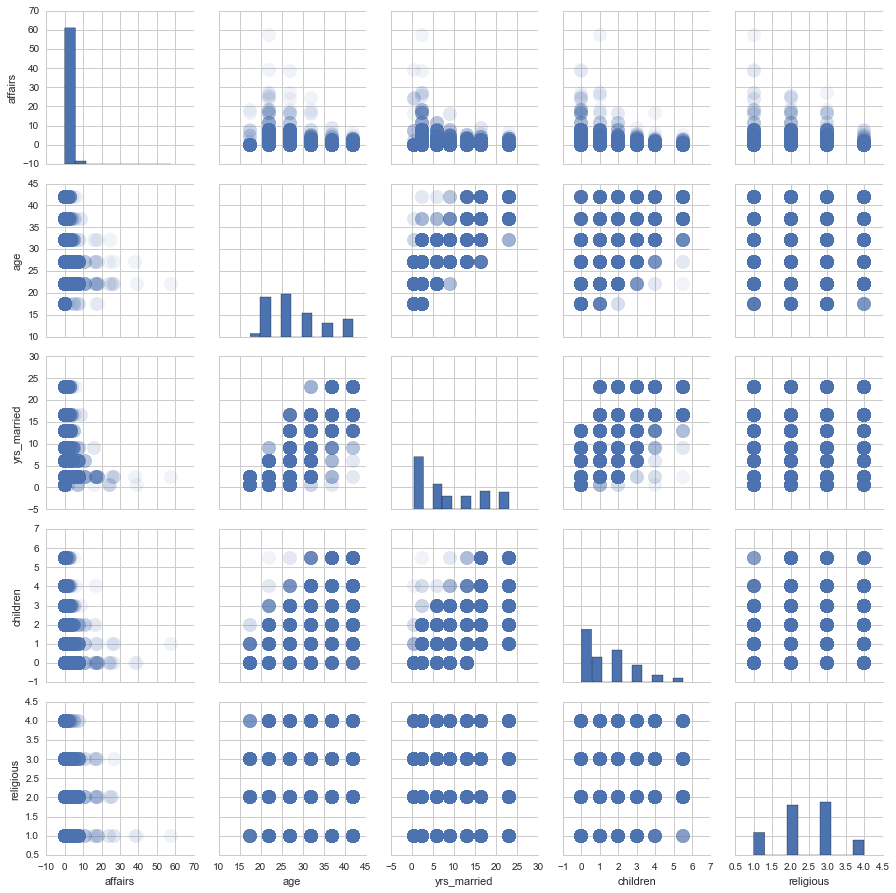

In [9]:
sns.pairplot(data=df[['affairs', 'age', 'yrs_married', 'children', 'religious']], 
        plot_kws = {'alpha':0.08, 's':180, 'edgecolor': None}, )

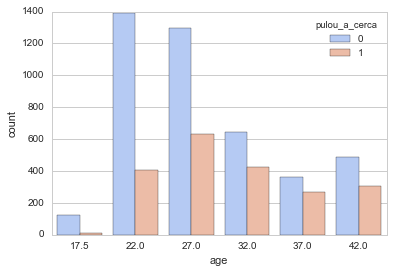

In [10]:
# Countplot com idade
sns.countplot(data=df, x='age', hue='pulou_a_cerca', palette='coolwarm')

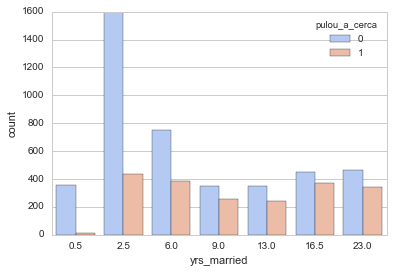

In [11]:
# Countplot com anos de casamento
sns.countplot('yrs_married',data=df,hue='pulou_a_cerca',palette='coolwarm')

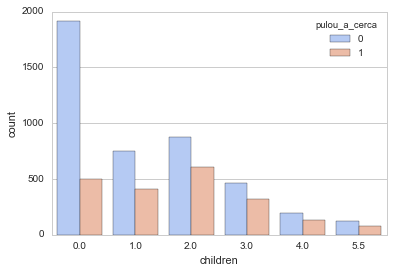

In [12]:
# Countplot com quantidade de filhos
sns.countplot('children',data=df,hue='pulou_a_cerca',palette='coolwarm')

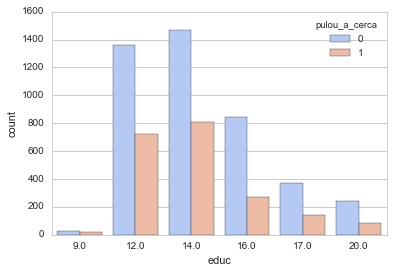

In [13]:
# Countplot com nivel de educação
sns.countplot('educ',data=df,hue='pulou_a_cerca',palette='coolwarm')

(0, 15)

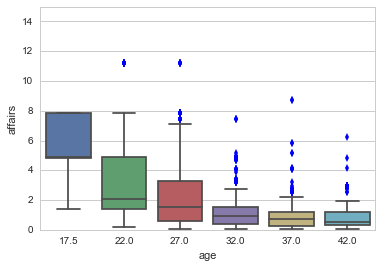

In [14]:
# considerando que a pessoa teve um caso extra-conjugal, 
# visualizacão da distribuição por boxplot
sns.boxplot(data=df[df.affairs > 0], x='age', y = 'affairs')
plt.ylim(0, 15)

(0, 15)

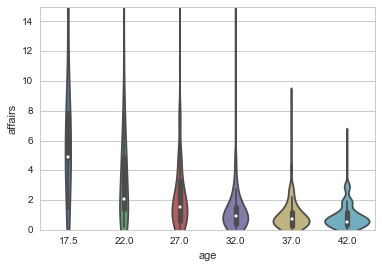

In [15]:
# considerando que a pessoa teve um caso extra-conjugal, 
# visualizacão da distribuição por violinplot
sns.violinplot(data=df[df.affairs > 0], x='age', y = 'affairs')
plt.ylim(0, 15)

#### pre-processamento

Notamos as variaveis categoricas Occupation e Husband's Occupation. De maneira similar a regressão linear, precisamos tratar essas colunas. Nesse caso, fazemos um OHE (one hot encoding). Importante: Labelencoding não funciona!!

Pandas tem um método para criar esses [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29) criando colunas dedicadas para cada valor encontrado.

In [16]:
# Cria novo DataFrame para as colunas categoricas
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
# Atribui nomes as colunas
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [18]:
# Atribui X primeiramente sem as colunas categoricas 
X = df.drop(['occupation','occupation_husb','pulou_a_cerca'],axis=1)

# Concatena os dataframes dummies
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [20]:
# Concatena o X com o dataframe dos dummies
X = pd.concat([X,dummies],axis=1)

# amostragem do X
X.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
685,2.0,37.0,16.5,3.0,1.0,14.0,1.187878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2168,5.0,37.0,16.5,3.0,1.0,16.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4823,5.0,27.0,0.5,0.0,2.0,17.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4459,5.0,37.0,16.5,3.0,3.0,17.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5801,4.0,42.0,23.0,4.0,4.0,16.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# Atribui y a coluna pulou_a_cerca
y = df.pulou_a_cerca

# amostragem do y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: pulou_a_cerca, dtype: int64

#### multicolinearidade

Notar que nos dataframe com as variaveis dummies, uma das colunas é combinação linear das outras.

Por exemplo, o valor da primeira coluna será igual a $1 - \sum_{i=2}^{k} x_i$, onde $x_i$ é o valor das coluna $i$ na mesma observação, e $k$ é a cardinalidade (quantidade de valores possíveis) da coluna categorica original.

Para remediar esse problema, bem simples, basta deletar uma das colunas.

In [22]:
# deletando uma coluna para cada coluna categorica
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# deletando coluna não utilizada
X = X.drop('affairs',axis=1)

# amostragem
X.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
5300,3.0,22.0,2.5,0.0,2.0,14.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3382,4.0,22.0,2.5,0.0,2.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4963,5.0,22.0,6.0,2.0,2.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4844,5.0,22.0,2.5,0.0,2.0,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1857,1.0,27.0,6.0,2.0,2.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
# transformando em numpy
y = y.values

# checando resultado
y

array([1, 1, 1, ..., 0, 0, 0])

### alternativa

In [24]:
# X = pd.get_dummies(df, columns=['occupation', 'occupation_husb'], 
#                    drop_first=True).drop(['affairs', 'pulou_a_cerca'], axis = 1)
# y = df.pulou_a_cerca.values

#### Rodando Regressão Logistica com sklearn 

In [25]:
# Instanciando objeto
log_model = LogisticRegression()

# Treinando o modelo
log_model.fit(X, y)

# Checando acurácia
log_model.score(X, y)

0.72588752748978946

In [26]:
# Checando a percentagem de mulheres com casos extra-conjugais
y.mean()

0.32249450204209867

In [27]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df.columns = ['feature', 'coeficiente']
coeff_df

,feature,coeficiente
0,rate_marriage,[-0.69778427609]
1,age,[-0.0562918764267]
2,yrs_married,[0.103843877797]
3,children,[0.018223039544]
4,religious,[-0.368475491279]
5,educ,[0.00875155090854]
6,occ2,[0.2985757099]
7,occ3,[0.608643255577]
8,occ4,[0.346643684172]
9,occ5,[0.942869882584]


In [28]:
coeff_df['coeficiente'] = [i[0] for i in coeff_df.coeficiente]

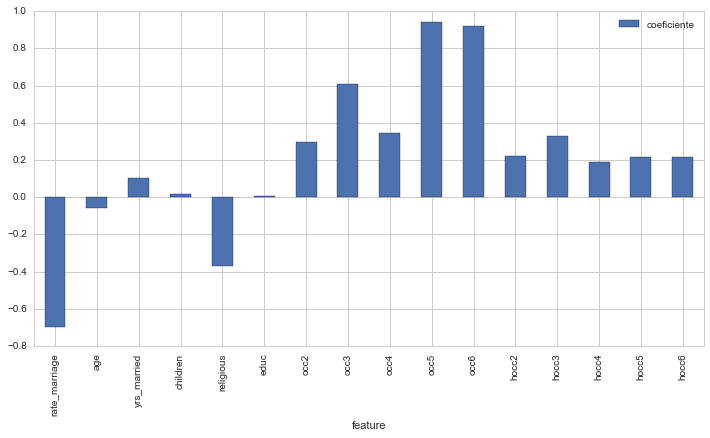

In [29]:
coeff_df.plot(kind='bar', x = 'feature', y = 'coeficiente', figsize=(12,6))

##### O que podemos observar pelos coeficientes acima?

### Treinamento e validação

In [30]:
# Segmentando a base
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instanciando um objeto
log_model2 = LogisticRegression()

# Treinando o modelo
log_model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [31]:
# Predizendo a classe das observações de teste
class_predict = log_model2.predict(X_test)

# Comparando as classes da predição e o gold, 
# ou seja, medindo a performance...
print metrics.accuracy_score(y_test,class_predict)

0.743718592965


In [32]:
# matriz de confusão
metrics.confusion_matrix(y_test, class_predict)

array([[1016,   96],
       [ 312,  168]])

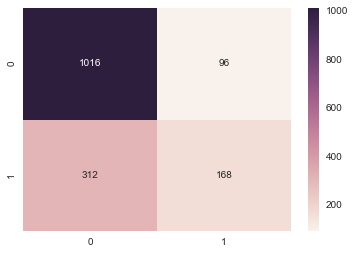

In [33]:
# Label gold na vertical, e label predição na horizontal
sns.heatmap(metrics.confusion_matrix(y_test, class_predict), annot=True, fmt ='d')

In [34]:
print metrics.classification_report(y_test, class_predict)

             precision    recall  f1-score   support

          0       0.77      0.91      0.83      1112
          1       0.64      0.35      0.45       480

avg / total       0.73      0.74      0.72      1592



### material adicional

Materiais disponiveis gratuitamente do Prof. Andrew Ng:

[MOOC Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome) <br>
[Curso CS229 no Youtube](https://www.youtube.com/playlist?list=PLA89DCFA6ADACE599) <br>
[Pagina do curso CS229](http://cs229.stanford.edu/)

# Aula 7, 13/outubro/2016

### Random Forests

Antes de falar de Random Forests vamos entender Decision Trees.

Texto interessante: [Random Forests](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411) 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

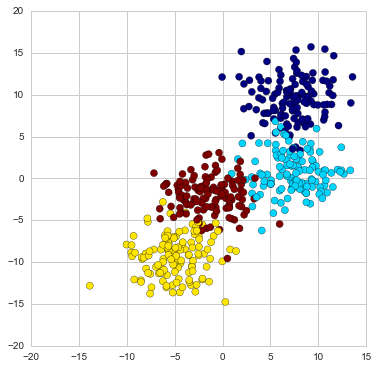

In [36]:
# Criando datasets
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap='jet')

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

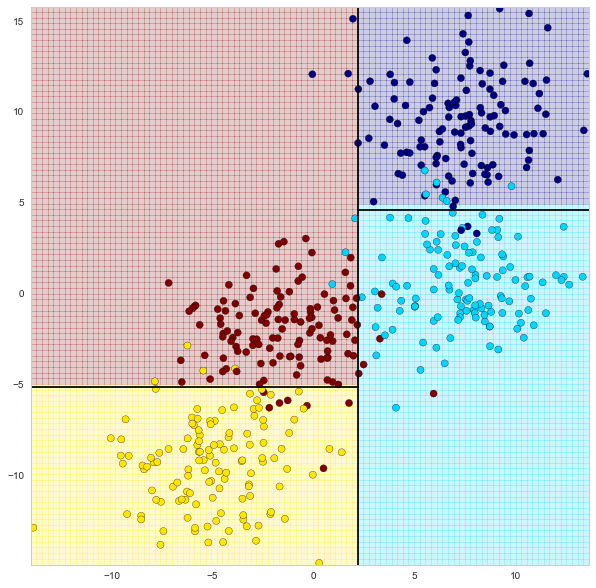

In [51]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

visualize_tree(clf, X, y)

In [49]:
np.bincount(y)

array([125, 125, 125, 125])

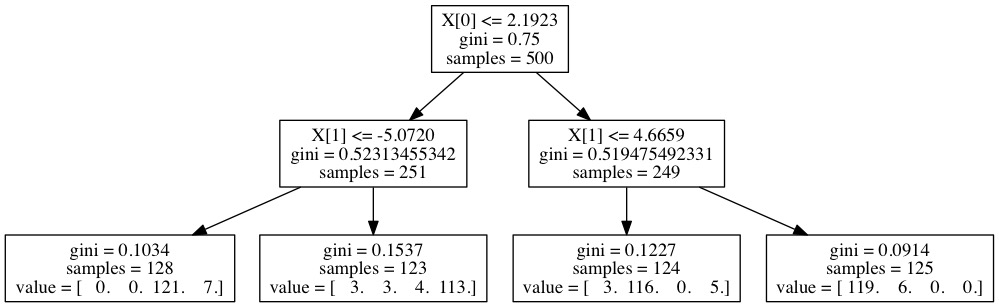

In [52]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot') 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('aula.jpg')

from IPython.display import Image 
Image('aula.jpg')

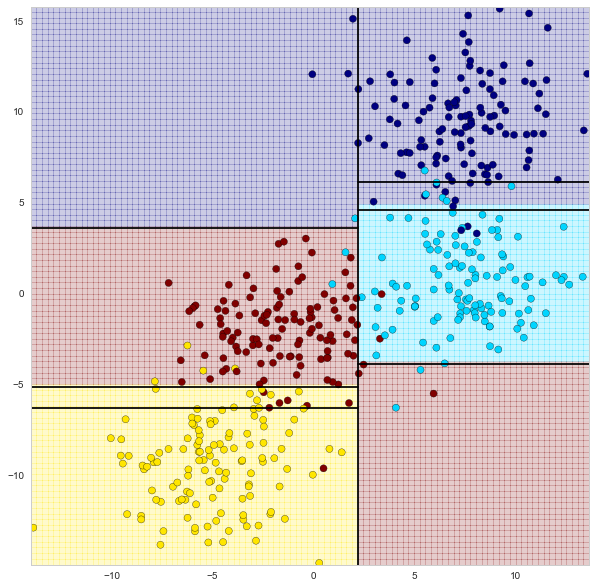

In [53]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

visualize_tree(clf, X, y)

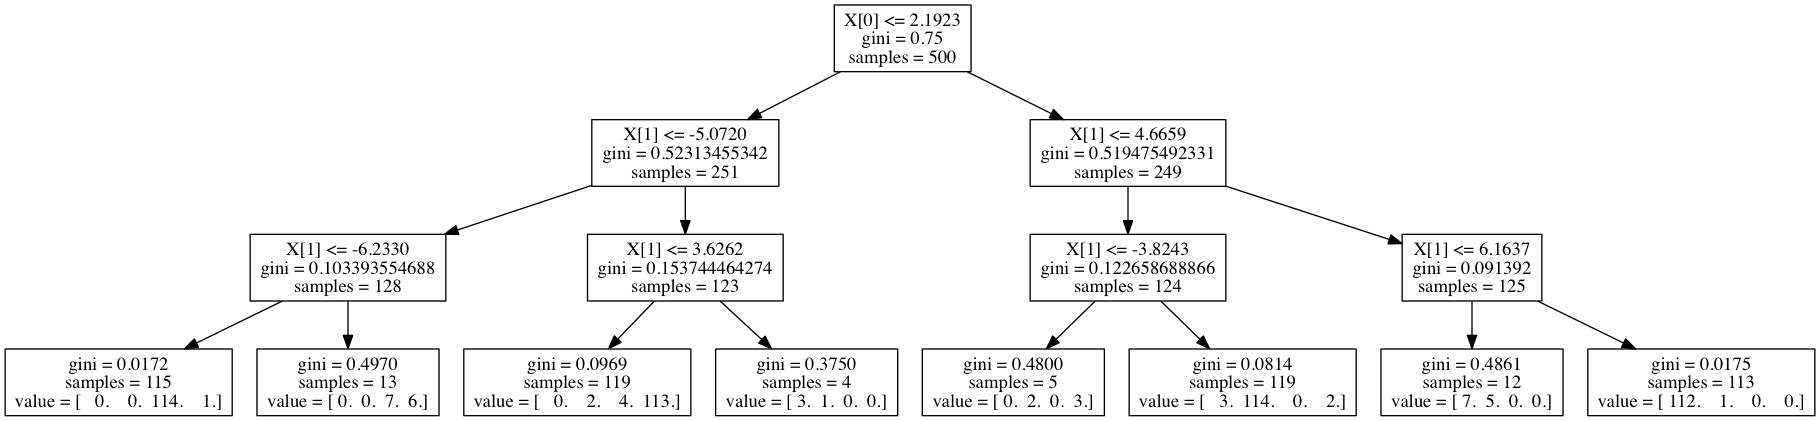

In [54]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot') 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('aula.jpg')

from IPython.display import Image 
Image('aula.jpg')

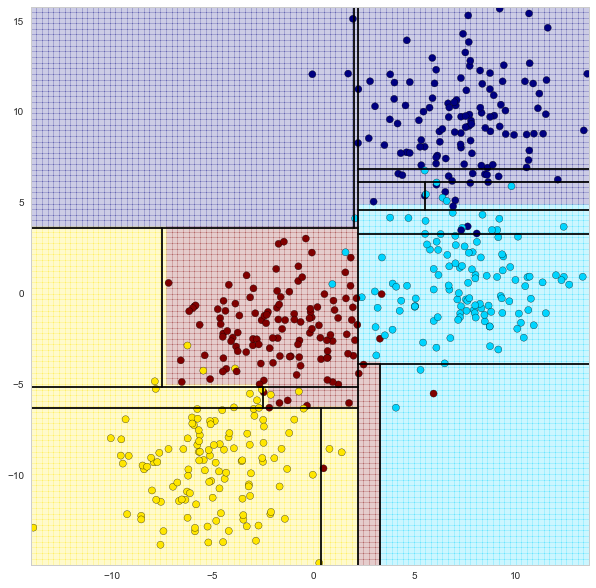

In [55]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

visualize_tree(clf, X, y)

Sinais de over-fitting: Muitas decisões de quebra levando a grupos muito granulares.

## Random Forests

Metodo baseado em ensemble, ou seja reune 'opiniões' de vários classificadores e tira-se a média das estimativas.
Esses classificadores são classificadores fracos (weak learner), e são assim denominados por que tem apenas uma visão parcial dos fatos. 

Uma parcialidade aleatórea forçada para cada classificador, técnica chamada de *bagging*. O objetivo do *bagging* é reduzir a variancia via um cancelamento de ruídos. 

No RF, os weak learners são decision trees, daí o termo 'forests' para o ensemble.    

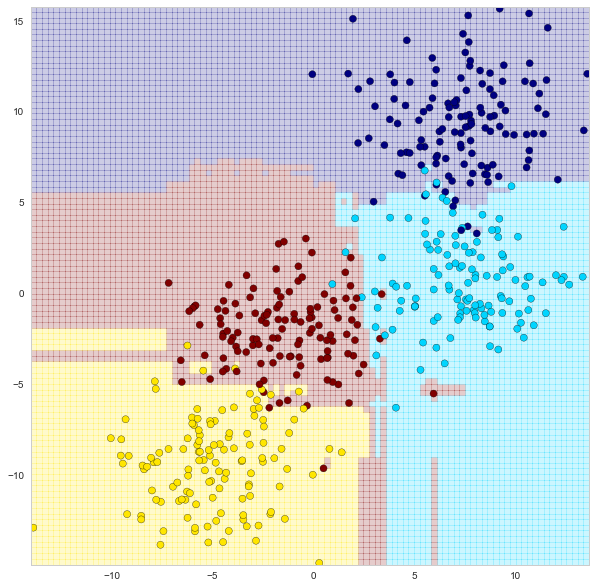

In [56]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)